In [ ]:
import GPy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import mnist
rawX = mnist.train_images()
rawX = rawX.astype(np.float32)
def subsample(X,step=3):
    return np.array([im[0::step,0::step] for im in X])
rawX = subsample(rawX)

allX = rawX.reshape(60000,np.prod(rawX.shape[1:])) #flatten it
ally = mnist.train_labels()
keep = ally<2
allX = allX[keep,:]
ally = ally[keep]
ally = ally[:,None]
X = allX[0:200,:]
y = ally[0:200,:]
testX = allX[200:300,:]
testy = ally[200:300,:]

In [1]:
!pwd

/home/mike/Documents/Research/adversarialGPLVM


In [ ]:
q = 4
kern = GPy.kern.RBF(q, ARD=True)
m = GPy.models.GPLVM(X, q, kernel=kern)

In [ ]:
m.plot_latent(labels=y,which_indices=[0,3])

In [ ]:
k = GPy.kern.RBF(4)
mc = GPy.models.GPClassification(m.X.values,y,k)
mc.optimize()

In [43]:
newX,b = m.infer_newX(testX[1:2,:])

In [44]:
pred, _ = mc.predict(newX.values)

In [45]:
pred

array([[ 0.9797388]])

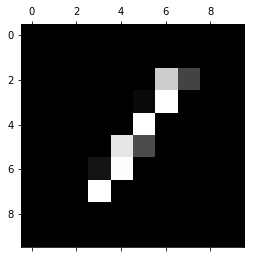

In [46]:
plt.matshow(testX[1:2,:].reshape(rawX.shape[1],rawX.shape[2]),cmap='gray')